In [21]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(tidyverse)
library(readr)
library(ggplot2)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [22]:
player_data <- read_csv("https://raw.githubusercontent.com/Laiann/25_Final_Group_Project_Section_003/refs/heads/main/players.csv")
player_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [23]:
head(player_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [24]:
#Wrangle:
clean_player_data <- player_data |> #This opens up the player data set and is assigned to clean_player_data
select(played_hours, Age, subscribe) |> #This line of code selects the columns that we are going to use in our model 
mutate(subscribe = as_factor(subscribe))
clean_player_data


played_hours,Age,subscribe
<dbl>,<dbl>,<fct>
30.3,9,TRUE
3.8,17,TRUE
0.0,17,FALSE
⋮,⋮,⋮
0.0,57,FALSE
2.3,17,FALSE
0.2,NA,TRUE


This table shows the variables that we are going to use in our classification model, both played_hours and age are the two variables that we are going to use to predict if the individuals subscription status 

In [25]:
#Summary statistics
players_mean <- clean_player_data |> #This code line selects the clean_player_data we formed above 
    summarize(
        mean_age = round(mean(Age,na.rm=TRUE),2),
        mean_played_hours =round(mean(played_hours,na.rm=TRUE),2)) #The summarize function is collecting the mean for the variables, na.rm=TRUE removes any observations that dont have any data 

players_mean


mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.85


The table above shows summary statistics for our predictor variables (age and played_hours)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


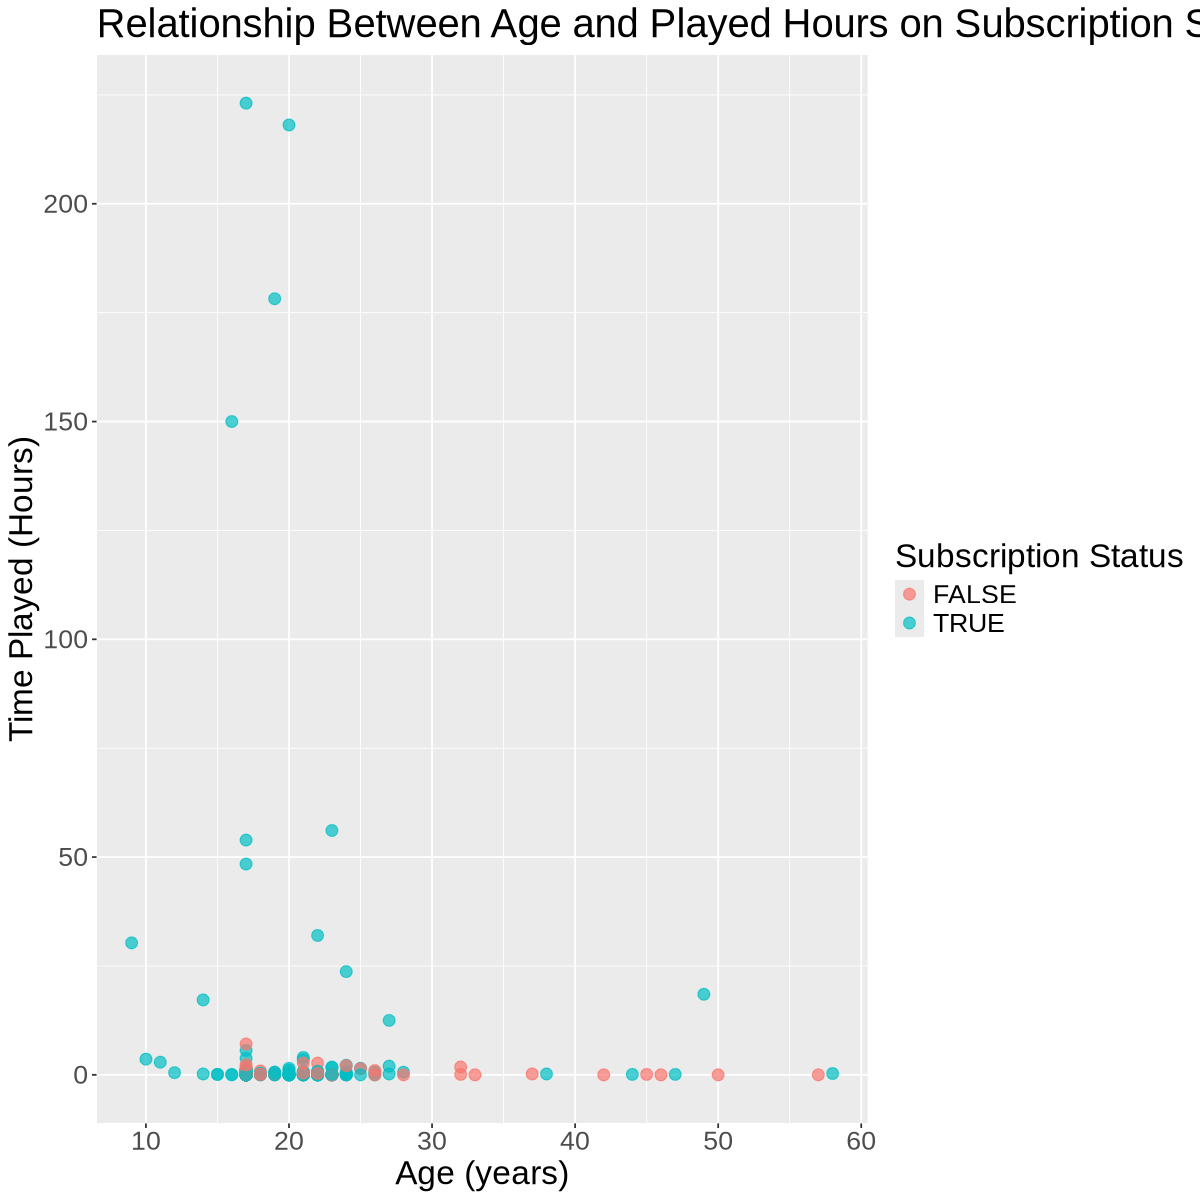

In [26]:
#Visualization 1
options(repr.plot.width = 10, repr.plot.height = 10) #This sets the plot width and height 
#The ggplot function allows us to plot the data with specific varaibles selected (Age and played hours)
#We are plotting the data on a scatterplot so we use the geom_point function
#Labs allows us to specifiy any axis labels or titles that we are going to use to ensure proper visualization techniques
players_figure_1 <- ggplot(clean_player_data, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(
    title = "Relationship Between Age and Played Hours on Subscription Status",
    x = "Age (years)",
    y = "Time Played (Hours)",
    color = "Subscription Status")+
theme(text = element_text(size = 20))  
players_figure_1

For Figure 1 a scatter plot was chosen in order to see the relationship between the two quantitative variables (age and hours played) and how these variables impact the subscription status. Additionally this visualisation was also used to see if there are any patterns or correlation between the variables and their effect on subscription status.

The incorporation of  alpha = 0.7 for transparency is a thoughtful design choice that addresses overplotting when taking into account two different variables being plotted against each other


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


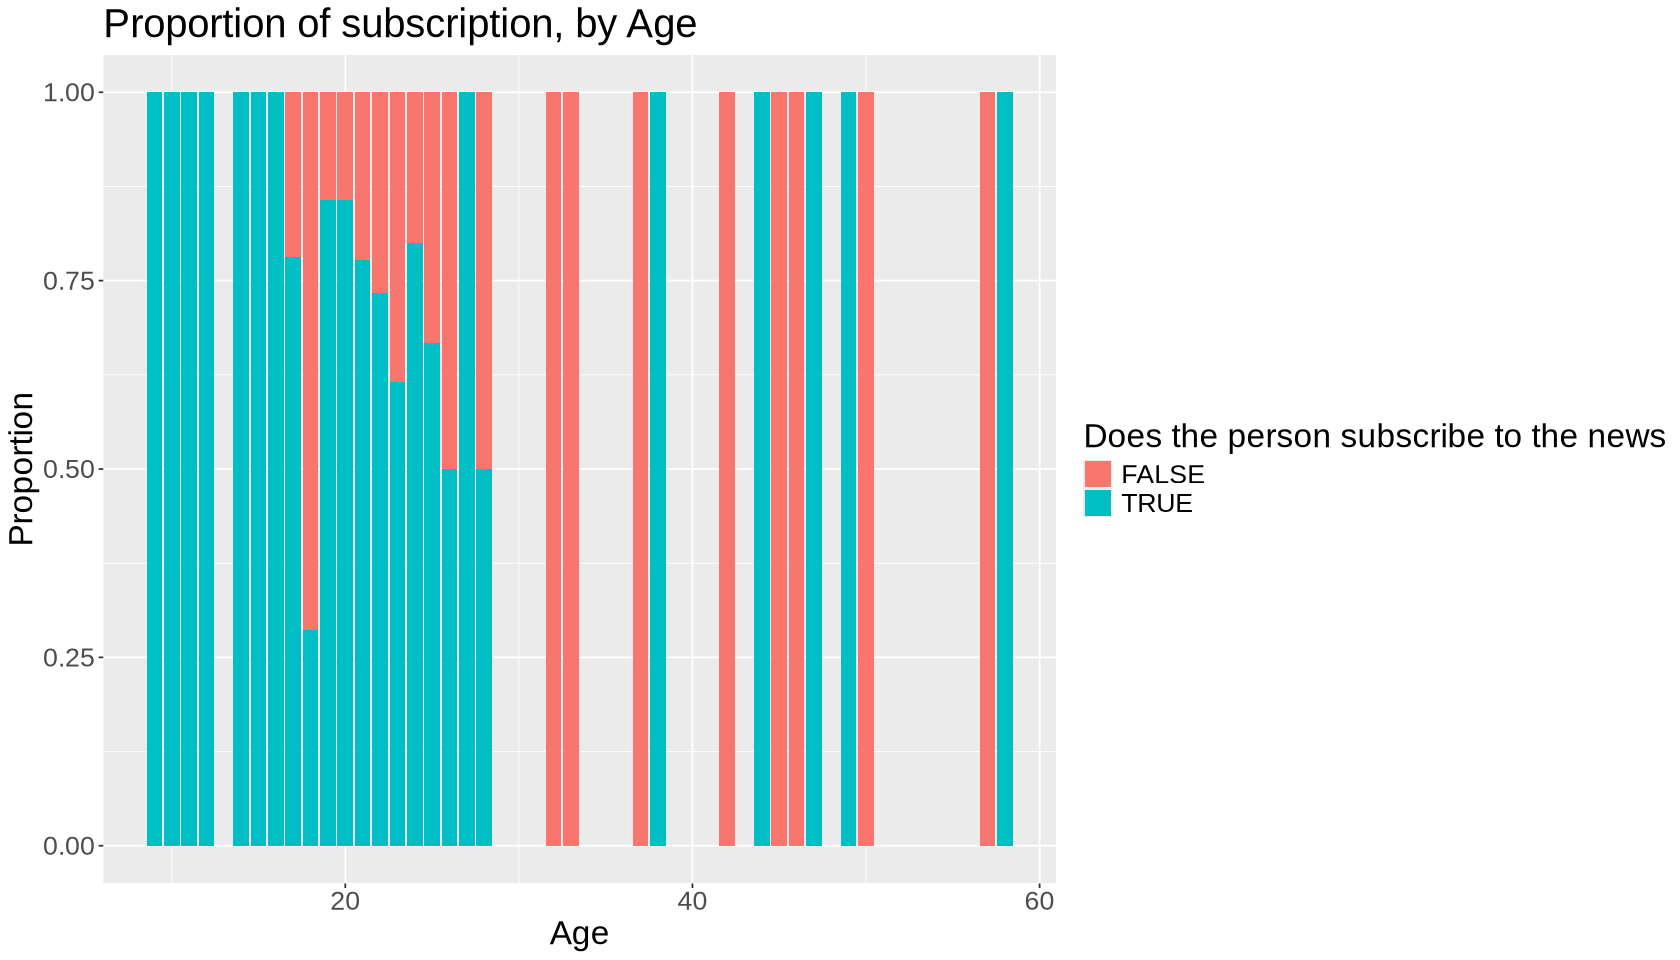

In [27]:
#Visualization 2
options(repr.plot.width = 14, repr.plot.height = 8) #This sets the plot width and height 
#The ggplot function allows us to plot the data with specific varaibles selected (Age and played hours)
#We are plotting the data on a bar plot so we use the geom_bar function
#Labs allows us to specifiy any axis labels or titles that we are going to use to ensure proper visualization techniques
players_figure_2 <- clean_player_data|>
  ggplot(aes(x = Age, fill = factor(subscribe))) + 
  geom_bar(position = 'fill') +
  labs(x = 'Age', y ='Proportion', fill = "Does the person subscribe to the news", title ='Proportion of subscription, by Age') +
  theme(text = element_text(size = 20))  
players_figure_2 


For Figure 2 a scatter bar plot was chosen to see the relationship between the Age and whether the person will subscribe to the news. Because the age is a discrete variable, bar graph is the most appropriate visualization way to express the proportion data.

The incorporation of position = 'fill' directly compares the proportion of subscribers versus non-subscribers at each age regardless of how many players exist in that age category.


In [28]:
#Setting the seed allows to code to be reproducible
set.seed(9999)

#Inital split will split the data up into training and testing data, the model will be trained on the training data
#The prop function allows use to set the poroption of the training data (75%) and strata is to ensure the postive classification oensure that the training and testing sets have roughly the same proportion of each class (TRUE/FALSE)
#Training funciton sets the training data set
#Testing sets the testing data set 
players_split <- initial_split(clean_player_data, prop = 0.75, strata = subscribe) 
players_train <- training(players_split) 
players_test <- testing(players_split)

#The recipe function allows us to set the recipe for the data with the two predictors 
#Step scale and step center are used to ensure that the variables are on similar scale so that the scale for Age or played_hours doesnt have more weight on the classifcation
players_recipe <- recipe(subscribe ~ Age + played_hours, data = clean_players_data) |> 
step_scale(all_predictors()) |>
step_center(all_predictors())




ERROR: Error in eval(expr, envir, enclos): object 'clean_players_data' not found
